In [5]:
!pip install nltk scikit-learn numpy pandas -q

In [6]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [7]:
# loading the movies dataset
movies = pd.read_csv('movies.csv')

In [8]:
# shape of the dataset (rows, columns)
movies.shape

(434437, 29)

In [9]:
# first 5 movies data
movies.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,genres,production_companies,production_countries,spoken_languages,keywords,directors,writers,averageRating,numVotes,cast
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",Christopher Nolan,Christopher Nolan,8.8,2684780,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan",8.7,2346977,"Matthew McConaughey, Anne Hathaway, Michael Ca..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...",9.0,3022443,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",James Cameron,James Cameron,7.9,1431576,"Sam Worthington, Zoe Saldaña, Sigourney Weaver..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",Joss Whedon,"Joss Whedon, Zak Penn",8.0,1508926,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ..."


In [10]:
# last 5 movies data
movies.tail()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,genres,production_companies,production_countries,spoken_languages,keywords,directors,writers,averageRating,numVotes,cast
434432,778129,A Real Adventure,0.0,0,Released,2018-04-27,0,16,False,NaN,...,NaN,NaN,NaN,NaN,NaN,Josh Zuckerman,Josh Zuckerman,7.3,22,NaN
434433,778133,The Cloister’s Touch,0.0,0,Released,1910-01-31,0,0,False,NaN,...,NaN,NaN,NaN,NaN,NaN,D.W. Griffith,Stanner E.V. Taylor,5.0,57,"Henry B. Walthall, Marion Leonard"
434434,778152,Hands of God,0.0,0,Released,2020-07-07,0,85,False,NaN,...,Documentary,NaN,NaN,NaN,"olympian sports team, iraq, sports documentary...",Riccardo Romani,NaN,6.6,22,NaN
434435,778156,Ariane,0.0,0,Released,NaN,0,0,False,NaN,...,NaN,NaN,NaN,Norwegian Bokmål,NaN,Carl August Klevjer,"Sondre H. Johansen, Mathias Bøe Jansen, Carl A...",8.7,6,"Helene Nagel, Herman Taksrud Berg"
434436,778157,Johnny Cash: The Man in Black in Britain,0.0,0,Released,2020-11-22,0,57,False,NaN,...,"Documentary, Music","Lonesome Pine Productions, Channel 5",United Kingdom,English,NaN,Nigel Cole,NaN,8.0,6,"Johnny Cash, June Carter Cash, Joanne Cash Yat..."


In [11]:
# information of the movies dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434437 entries, 0 to 434436
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    434437 non-null  int64  
 1   title                 434437 non-null  object 
 2   vote_average          434437 non-null  float64
 3   vote_count            434437 non-null  int64  
 4   status                434437 non-null  object 
 5   release_date          415357 non-null  object 
 6   revenue               434437 non-null  int64  
 7   runtime               434437 non-null  int64  
 8   adult                 434437 non-null  bool   
 9   backdrop_path         184278 non-null  object 
 10  budget                434437 non-null  int64  
 11  homepage              54333 non-null   object 
 12  tconst                434437 non-null  object 
 13  original_language     434437 non-null  object 
 14  original_title        434437 non-null  object 
 15  

In [12]:
# selecting the most important columns which are relevant for the recommendation system

requriedColumns = ['title', 'genres', 'keywords', 'cast', 'directors', 'original_language', 'writers', 'overview']

In [13]:
movies = movies[requriedColumns]

In [14]:
movies.head(5)

,title,genres,keywords,cast,directors,original_language,writers,overview
0,Inception,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...","Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...",Christopher Nolan,en,Christopher Nolan,"Cobb, a skilled thief who commits corporate es..."
1,Interstellar,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...","Matthew McConaughey, Anne Hathaway, Michael Ca...",Christopher Nolan,en,"Jonathan Nolan, Christopher Nolan",The adventures of a group of explorers who mak...
2,The Dark Knight,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",Christopher Nolan,en,"Jonathan Nolan, Christopher Nolan, David S. Go...",Batman raises the stakes in his war on crime. ...
3,Avatar,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...","Sam Worthington, Zoe Saldaña, Sigourney Weaver...",James Cameron,en,James Cameron,"In the 22nd century, a paraplegic Marine is di..."
4,The Avengers,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",Joss Whedon,en,"Joss Whedon, Zak Penn",When an unexpected enemy emerges and threatens...


In [15]:
movies.shape

(434437, 8)

In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434437 entries, 0 to 434436
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   title              434437 non-null  object
 1   genres             356256 non-null  object
 2   keywords           170762 non-null  object
 3   cast               365859 non-null  object
 4   directors          424174 non-null  object
 5   original_language  434437 non-null  object
 6   writers            367909 non-null  object
 7   overview           392556 non-null  object
dtypes: object(8)
memory usage: 26.5+ MB


In [17]:
# handle null values from the dataset
movies.isnull().sum()

title                     0
genres                78181
keywords             263675
cast                  68578
directors             10263
original_language         0
writers               66528
overview              41881
dtype: int64

In [18]:
movies.dropna(inplace=True)

In [19]:
movies.isnull().sum()

title                0
genres               0
keywords             0
cast                 0
directors            0
original_language    0
writers              0
overview             0
dtype: int64

In [20]:
movies.shape

(127984, 8)

In [21]:
# handle duplicate values from the dataset
movies.duplicated().sum()

np.int64(2)

In [22]:
movies.drop_duplicates(inplace=True)

In [23]:
movies.duplicated().sum()

np.int64(0)

In [24]:
movies.shape

(127982, 8)

In [25]:
# it's a big dataset with 140053 movies data, to avoid system crash taking first 25000 movies data
movies = movies.iloc[:24000, :]

In [26]:
movies.shape

(24000, 8)

In [27]:
movies['tag'] = movies['title'] + ' ' + movies['genres'] + ' ' + movies['keywords'] + ' ' + movies['cast'] + ' ' + movies['directors'] + ' ' + movies['original_language'] + ' ' + movies['writers'] + ' ' + movies['overview']

In [28]:
movies.head()

,title,genres,keywords,cast,directors,original_language,writers,overview,tag
0,Inception,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...","Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...",Christopher Nolan,en,Christopher Nolan,"Cobb, a skilled thief who commits corporate es...","Inception Action, Science Fiction, Adventure r..."
1,Interstellar,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...","Matthew McConaughey, Anne Hathaway, Michael Ca...",Christopher Nolan,en,"Jonathan Nolan, Christopher Nolan",The adventures of a group of explorers who mak...,"Interstellar Adventure, Drama, Science Fiction..."
2,The Dark Knight,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",Christopher Nolan,en,"Jonathan Nolan, Christopher Nolan, David S. Go...",Batman raises the stakes in his war on crime. ...,"The Dark Knight Drama, Action, Crime, Thriller..."
3,Avatar,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...","Sam Worthington, Zoe Saldaña, Sigourney Weaver...",James Cameron,en,James Cameron,"In the 22nd century, a paraplegic Marine is di...","Avatar Action, Adventure, Fantasy, Science Fic..."
4,The Avengers,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",Joss Whedon,en,"Joss Whedon, Zak Penn",When an unexpected enemy emerges and threatens...,"The Avengers Science Fiction, Action, Adventur..."


In [29]:
movies.tail()

,title,genres,keywords,cast,directors,original_language,writers,overview,tag
29038,Arrowhead,"Action, Adventure, Mystery, Science Fiction","australia, alien, stranded, signal","Dan Mor, Aleisha Rose, Shaun Micallef, Mark Re...",Jesse O'Brien,en,Jesse O'Brien,Kye is a prisoner of war caught between two ar...,"Arrowhead Action, Adventure, Mystery, Science ..."
29040,Digimon Adventure tri. Part 2: Determination,"Animation, Adventure, Science Fiction","monster, anime, proxy battle, digimon","Natsuki Hanae, Yoshimasa Hosoya, Suzuko Mimori...",Keitarô Motonaga,ja,"Akiyoshi Hongo, Yûko Kakihara",The DigiDestined go to a nearby hot springs th...,Digimon Adventure tri. Part 2: Determination A...
29041,Man of Aran,Documentary,"island, fisherman, ireland, shark, hardship, s...","Colman 'Tiger' King, Maggie Dirrane, Michael D...",Robert J. Flaherty,en,Robert J. Flaherty,A documentary on the life of the people of th...,"Man of Aran Documentary island, fisherman, ire..."
29042,SeaFood,"Animation, Comedy, Family, Adventure","underwater, sea creature","Steven Bone, Colin Chong, Jason Cottom, Kennie...",Aun Hoe Goh,th,Jeffrey Chiang,"Pup, a bamboo shark, discovers egg sacs while ...","SeaFood Animation, Comedy, Family, Adventure u..."
29043,Rails & Ties,Drama,"train accident, sorrow, accidental death, woma...","Kevin Bacon, Marcia Gay Harden, Miles Heizer, ...",Alison Eastwood,en,Micky Levy,A deadly collision between a train and car lea...,"Rails & Ties Drama train accident, sorrow, acc..."


In [54]:
data = movies[['title', 'tag']].copy()

In [31]:
data.shape

(24000, 2)

In [32]:
data.head()

,title,tag
0,Inception,"Inception Action, Science Fiction, Adventure r..."
1,Interstellar,"Interstellar Adventure, Drama, Science Fiction..."
2,The Dark Knight,"The Dark Knight Drama, Action, Crime, Thriller..."
3,Avatar,"Avatar Action, Adventure, Fantasy, Science Fic..."
4,The Avengers,"The Avengers Science Fiction, Action, Adventur..."


In [33]:
data.tail()

,title,tag
29038,Arrowhead,"Arrowhead Action, Adventure, Mystery, Science ..."
29040,Digimon Adventure tri. Part 2: Determination,Digimon Adventure tri. Part 2: Determination A...
29041,Man of Aran,"Man of Aran Documentary island, fisherman, ire..."
29042,SeaFood,"SeaFood Animation, Comedy, Family, Adventure u..."
29043,Rails & Ties,"Rails & Ties Drama train accident, sorrow, acc..."


In [34]:
data['tag'][0]

'Inception Action, Science Fiction, Adventure rescue, mission, dream, airplane, paris, france, virtual reality, kidnapping, philosophy, spy, allegory, manipulation, car crash, heist, memory, architecture, los angeles, california, dream world, subconscious Leonardo DiCaprio, Joseph Gordon-Levitt, Ken Watanabe, Tom Hardy, Elliot Page, Dileep Rao, Cillian Murphy, Tom Berenger, Marion Cotillard, Pete Postlethwaite Christopher Nolan en Christopher Nolan Cobb, a skilled thief who commits corporate espionage by infiltrating the subconscious of his targets is offered a chance to regain his old life as payment for a task considered to be impossible: "inception", the implantation of another person\'s idea into a target\'s subconscious.'

In [35]:
# download nltk data

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\YASIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\YASIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\YASIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
# english stop words like - the, are, in, to, into, and, an, a, by and etc...
stop_words = set(stopwords.words('english'))

In [37]:
# function will process the text by remove special character and number, convert into lowercase and remove stopwords from the text
def preprocessText(text):
  text = re.sub(r"[^a-zA-Z\s]", "", text)
  text = text.lower()
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words]
  return " ".join(tokens)


In [38]:
data.head()

,title,tag
0,Inception,"Inception Action, Science Fiction, Adventure r..."
1,Interstellar,"Interstellar Adventure, Drama, Science Fiction..."
2,The Dark Knight,"The Dark Knight Drama, Action, Crime, Thriller..."
3,Avatar,"Avatar Action, Adventure, Fantasy, Science Fic..."
4,The Avengers,"The Avengers Science Fiction, Action, Adventur..."


In [39]:
# preprocessing the movies tags text
data['processed_tag'] = data['tag'].apply(preprocessText)

C:\Users\YASIN\AppData\Local\Temp\ipykernel_11288\1255604065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['processed_tag'] = data['tag'].apply(preprocessText)


In [40]:
data.head()

,title,tag,processed_tag
0,Inception,"Inception Action, Science Fiction, Adventure r...",inception action science fiction adventure res...
1,Interstellar,"Interstellar Adventure, Drama, Science Fiction...",interstellar adventure drama science fiction r...
2,The Dark Knight,"The Dark Knight Drama, Action, Crime, Thriller...",dark knight drama action crime thriller joker ...
3,Avatar,"Avatar Action, Adventure, Fantasy, Science Fic...",avatar action adventure fantasy science fictio...
4,The Avengers,"The Avengers Science Fiction, Action, Adventur...",avengers science fiction action adventure new ...


In [41]:
data['processed_tag'][0]

'inception action science fiction adventure rescue mission dream airplane paris france virtual reality kidnapping philosophy spy allegory manipulation car crash heist memory architecture los angeles california dream world subconscious leonardo dicaprio joseph gordonlevitt ken watanabe tom hardy elliot page dileep rao cillian murphy tom berenger marion cotillard pete postlethwaite christopher nolan en christopher nolan cobb skilled thief commits corporate espionage infiltrating subconscious targets offered chance regain old life payment task considered impossible inception implantation another persons idea targets subconscious'

In [42]:
data['tag'][0]

'Inception Action, Science Fiction, Adventure rescue, mission, dream, airplane, paris, france, virtual reality, kidnapping, philosophy, spy, allegory, manipulation, car crash, heist, memory, architecture, los angeles, california, dream world, subconscious Leonardo DiCaprio, Joseph Gordon-Levitt, Ken Watanabe, Tom Hardy, Elliot Page, Dileep Rao, Cillian Murphy, Tom Berenger, Marion Cotillard, Pete Postlethwaite Christopher Nolan en Christopher Nolan Cobb, a skilled thief who commits corporate espionage by infiltrating the subconscious of his targets is offered a chance to regain his old life as payment for a task considered to be impossible: "inception", the implantation of another person\'s idea into a target\'s subconscious.'

In [43]:
# vectorization with TF-IDF

tfidf_vectors = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectors.fit_transform(data['processed_tag'])

# Formula for TF-IDF -
IDF(word) = (log((1 + N) / 1 + DF(word))) + 1

TF-IDF = TF(word, document) * IDF(word) = TF * IDF

Here :

  TF(word, document) = Frequency of the word in that document

  DF(word) = Number of documents that contain the word

  N = Total number of documents

  log = e based Logarithm




# TF-IDF Calculation Example -

Document 1 : peter parker is spiderman

Document 2 : spiderman is famous superhero

Document 3 : spiderman, spiderman is marbel superhero


# TF-IDF Table -
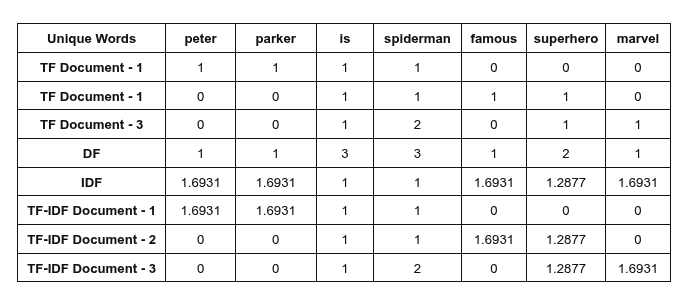




In [44]:
tfidf_matrix.shape

(24000, 5000)

In [45]:
similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [46]:
similarity.shape

(24000, 24000)

In [47]:
print(similarity[1])

[0.18459647 1.         0.15750426 ... 0.00526674 0.03096758 0.00275147]


In [48]:
data['title']


0                                           Inception
1                                        Interstellar
2                                     The Dark Knight
3                                              Avatar
4                                        The Avengers
                             ...                     
29038                                       Arrowhead
29040    Digimon Adventure tri. Part 2: Determination
29041                                     Man of Aran
29042                                         SeaFood
29043                                    Rails & Ties
Name: title, Length: 24000, dtype: object

In [49]:
movie_index = data[data['title'] == 'Avatar'].index
print(movie_index)

Index([3], dtype='int64')


In [50]:
movie_index = data[data['title'] == 'Avatar'].index
print(movie_index)

Index([3], dtype='int64')


In [51]:
my_movie_name = data['title'][4]
print(my_movie_name)

The Avengers


In [52]:
def recommendation(movie_name, similarity=similarity, data=data, recommendNumber=10):
    movie_index = data[data['title'].str.lower() == movie_name.lower()].index

    if movie_index.empty:
        return [], False

    movie_index = movie_index[0]

    similarity_score = list(enumerate(similarity[movie_index]))
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)

    similarity_score = similarity_score[1:recommendNumber+1]

    movie_indices = [i[0] for i in similarity_score]

    return data['title'].iloc[movie_indices], True


In [53]:
movie_name = input("The Flim Oracle gives you top similar movies.\nEnter a movie name : ")
recommend_movies, flag = recommendation(movie_name)

if(flag):
    serial = 1
    for movie in recommend_movies:
      print(f"{serial}. {movie}")
      serial += 1
else:
    print("The movie you are searching for is not available in the dataset!")


1. Whiplash
2. Chasing Trane
3. The Cotton Club
4. Whiplash
5. Sweet and Lowdown
6. Guy and Madeline on a Park Bench
7. Born to Be Blue
8. Miss Pettigrew Lives for a Day
9. Soul
10. Hipsters
